In [38]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
X_train=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/X_train.csv')
X_val=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/X_val.csv')
X_test=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/X_test.csv')
y_train=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/y_train.csv')
y_val=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/y_val.csv')
y_test=pd.read_csv('C:/Users/prodi/Documents/SCU/Machine Learning/Final Project/Credit card/data/y_test.csv')

In [5]:
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE(kind='regular')
X_train_sm, y_train_sm = smote.fit_sample(X_train,y_train)

In [18]:
X_train_sm.shape
y_train_sm.shape

(399318, 53)

(399318,)

In [20]:
y_train.sum()
y_train_sm.sum()

y    341
dtype: int64

199659

## Function to calculate the total cost of fraud

In [69]:
def total_fraud_cost(X,y_actual,y_pred):
    
    df_cost = pd.concat([X,y_actual.rename(columns={y_test.columns[0] : 'actual'}),y_pred.rename(
    columns={y_pred.columns[0]: 'predicted'})],axis=1)
    
    fp_cost = df_cost[(df_cost.actual==0) & (df_cost.predicted==1)].Amount.sum()*0.5
    merchant_fee_cost = (1.75/100)*fp_cost
    fn_cost = df_cost[(df_cost.actual==1) & (df_cost.predicted==0)].Amount.sum()
    total_cost = fp_cost + merchant_fee_cost + fn_cost
    return total_cost

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(max_depth=None,max_leaf_nodes=None)
    clf.fit(features, target)
    return clf

In [29]:
# Create random forest classifier instance

trained_model = random_forest_classifier(X_train_sm, y_train_sm)
print("Trained model :: %s" %trained_model)

Trained model :: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [31]:
# Make predictions

y_pred_rf = trained_model.predict(X_val)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

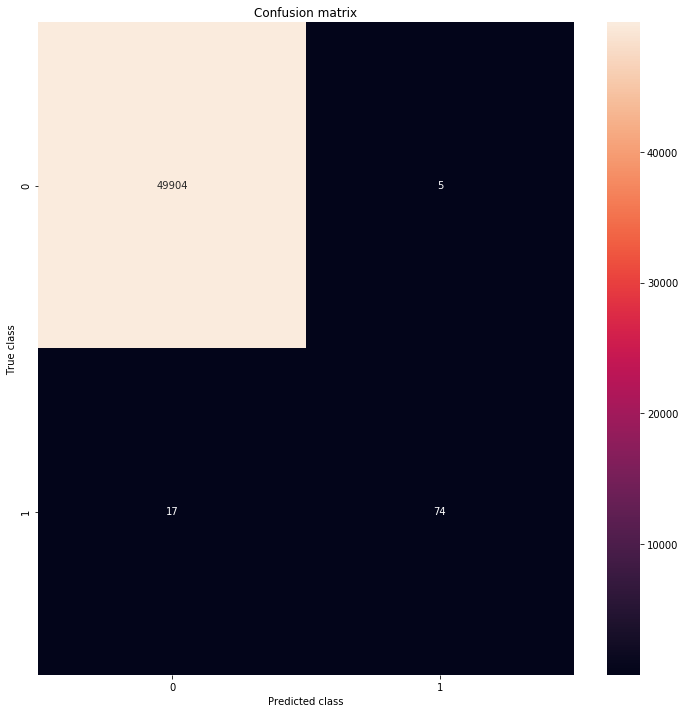

0.8705882352941177

In [39]:
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_val, y_pred_rf)
#roc_auc_score(y_val,y_prob_rf)

In [40]:
y_pred_rf_t = trained_model.predict(X_test)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

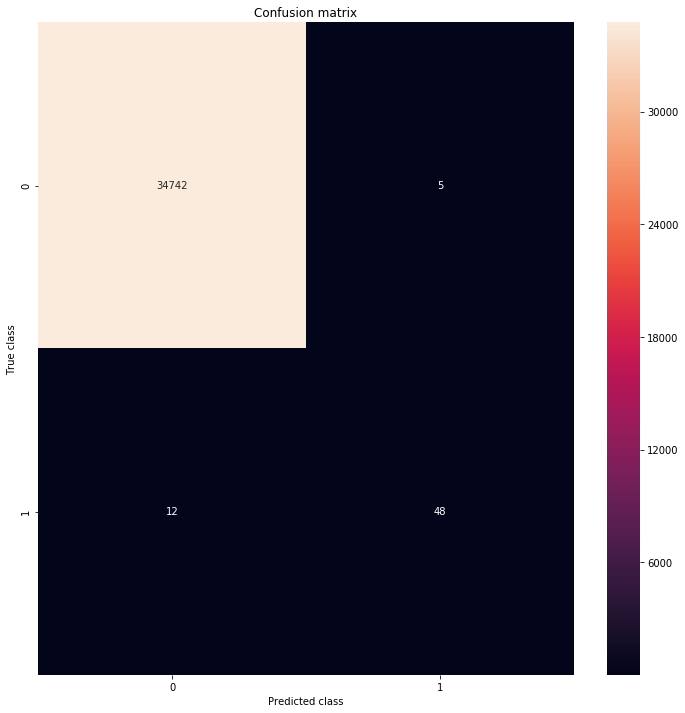

0.8495575221238938

In [41]:
conf_matrix_rf_t = confusion_matrix(y_test, y_pred_rf_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_rf_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred_rf_t)
#roc_auc_score(y_val,y_prob_rf)

In [70]:
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_rf_t))

1991.309425

## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
gnb = GaussianNB()

In [44]:
NB_model = gnb.fit(X_train_sm, y_train_sm)

In [45]:
y_pred_nb = NB_model.predict(X_val)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

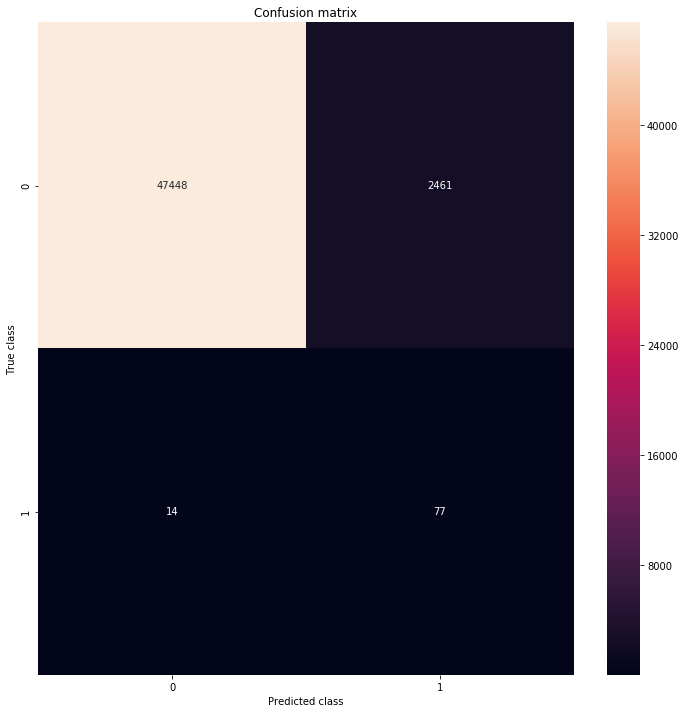

0.058577405857740586

In [47]:
conf_matrix_nb = confusion_matrix(y_val, y_pred_nb)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_val, y_pred_nb)
#roc_auc_score(y_val,y_prob_rf)

In [48]:
y_pred_nb_t = NB_model.predict(X_test)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

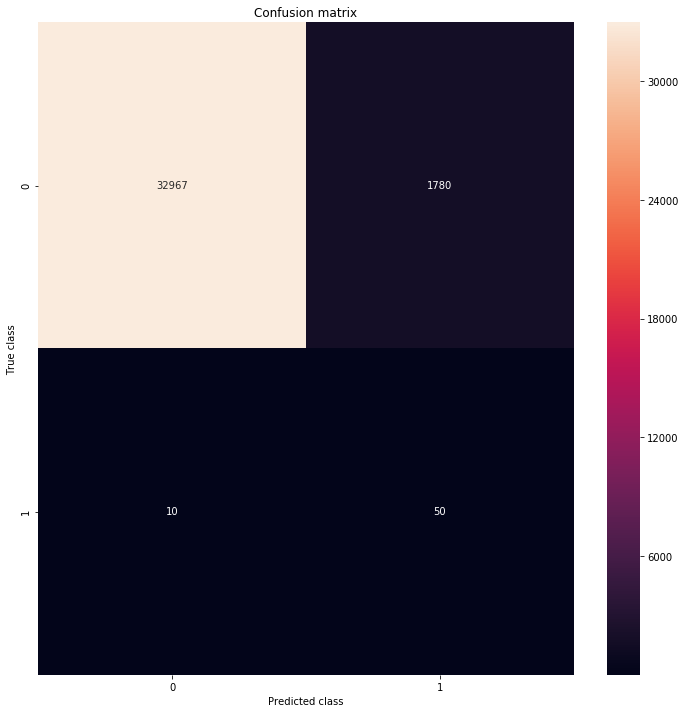

0.0529100529100529

In [49]:
conf_matrix_nb_t = confusion_matrix(y_test, y_pred_nb_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_nb_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred_nb_t)
#roc_auc_score(y_val,y_prob_rf)

In [71]:
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_nb_t))

192110.87737499998

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression()

In [52]:
lr_model.fit(X_train_sm,y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_pred_lr = lr_model.predict(X_val)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

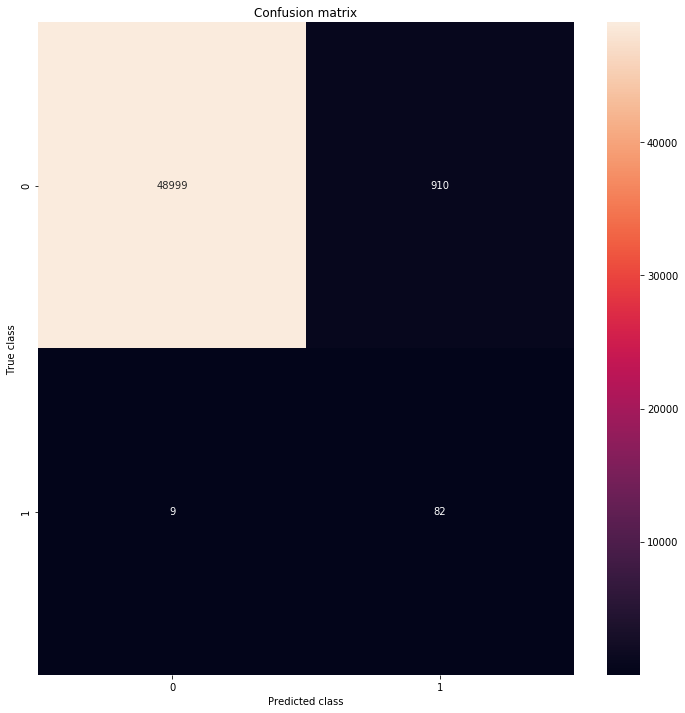

0.15143120960295475

In [55]:
conf_matrix_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_val, y_pred_lr)
#roc_auc_score(y_val,y_prob_rf)

In [57]:
y_pred_lr_t = lr_model.predict(X_test)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

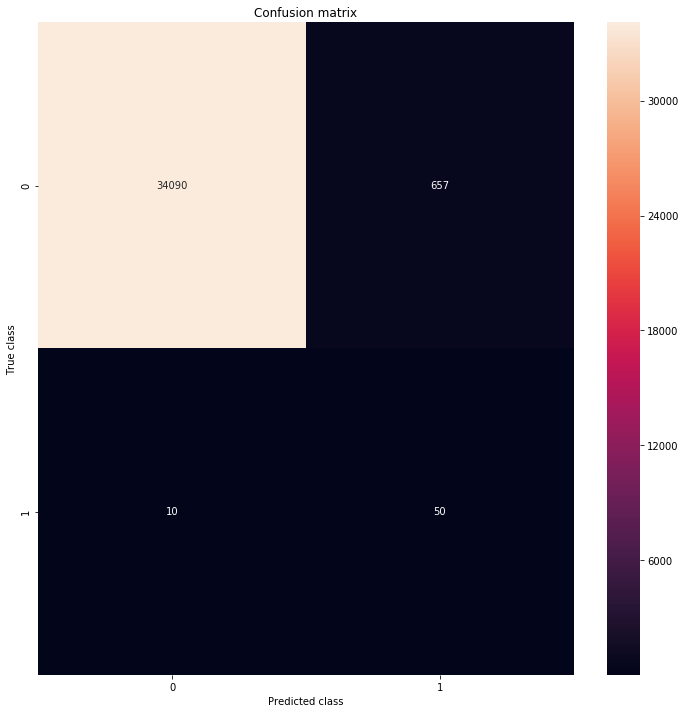

0.1303780964797914

In [59]:
conf_matrix_lr_t = confusion_matrix(y_test, y_pred_lr_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_lr_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred_lr_t)
#roc_auc_score(y_val,y_prob_rf)

In [72]:
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_lr_t))

34595.2894625

# SVM

In [73]:
from sklearn import svm

In [74]:
svm_model = svm.SVC()

In [75]:
svm_model.fit(X_train_sm,y_train_sm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
y_pred_svm = svm_model.predict(X_val)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

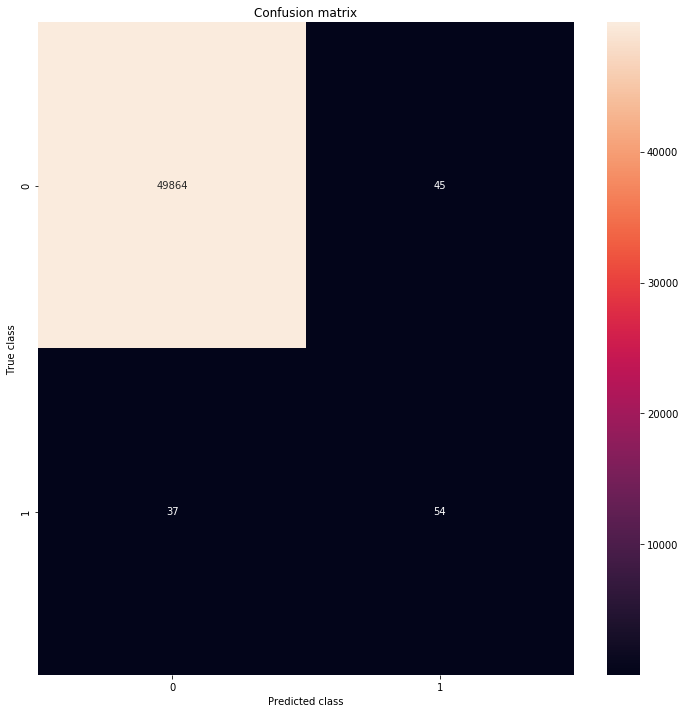

0.5684210526315788

In [77]:
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_val, y_pred_svm)
#roc_auc_score(y_val,y_prob_rf)

In [78]:
y_pred_svm_t = svm_model.predict(X_test)

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

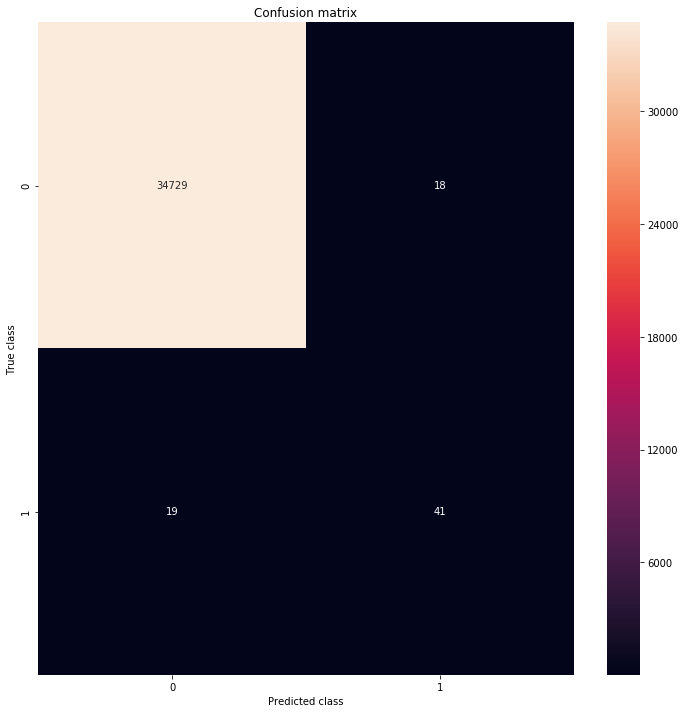

0.6890756302521008

In [79]:
conf_matrix_svm_t = confusion_matrix(y_test, y_pred_svm_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_svm_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred_svm_t)
#roc_auc_score(y_val,y_prob_rf)

In [80]:
total_fraud_cost(X_test,y_test,pd.DataFrame(y_pred_svm_t))

3289.7504625

In [81]:
import pickle

In [82]:
filename='svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))